# Описание проекта

В рамках проекта необходимо научиться предсказывать с помощью модели линейной регрессии итоговую оценку ученика в году

Для решения задачи есть набор данных с информацией про успеваемость по математике 395 учеников двух португальских школ. Каждый ученик описывается большим набором факторов, подробное описание которых приведено дальше. Данные были собраны в период 2005–2006 учебного года

В Португалии учебный год разбит на три периода обучения поменьше, и в конце каждого из них ученики получают оценку по предмету. Итоговой оценкой по предмету в году считается оценка, полученная в конце третьего периода обучения. Для каждого ученика её значение находится в колонке G3. Именно эту характеристику необходимо научиться предсказывать

Описание таблицы student_mat

- school — школа, в которой учится ученик (бинарный: GP — Gabriel Pereira или MS — Mousinho da Silveira).
- gender — пол ученика (бинарный: F — женский или M — мужской).
- age — возраст ученика (численный: от 15 до 22).
- address — тип местности, в которой живёт ученик (бинарный: U — город или R — пригород).
- famsize — размер семьи (бинарный: LE3 — «не больше 3 человек» или GT3 — «больше 3 человек»).
- Pstatus — семейный статус родителей (бинарный: T — «живут вместе» или A — «живут раздельно»).
- Medu — образование матери (численный: 0 — «нет образования», 1 — «начальная школа» (4 класса), 2 — «от 5 до 9 классов», 3 — «среднее образование» или 4 — «высшее образование»).
- Fedu — образование отца (численный: 0 — «нет образования», 1 — «начальная школа» (4 класса), 2 — «от 5 до 9 классов», 3 — «среднее образование» или 4 — «высшее образование»).
- Mjob — работа матери (категориальный: teacher — «учитель», health — «работа в здравоохранении», services — «гражданская служба», at_home — «домохозяйка» или другое — «другое»).
- Fjob — работа отца (категориальный: teacher — «учитель», health — «работа в здравоохранении», services — «гражданская служба», at_home — «домохозяин» или другое — «другое»).
- reason — причина выбора этой школы (категориальный: home — «близко к дому», reputation — «репутация школы», course — «выбор предметов» или other — «другое»).
- guardian — попечитель ученика (категориальный: mother — «мать», father — «отец» или other — «кто-то другой»).
- traveltime — время в пути от дома до школы (численный: 1 — «меньше 15 минут», 2 — «от 15 до 30 минут», 3 — «от 30 минут до 1 часа» или 4 — «больше 1 часа»).
- studytime — время на учёбу в неделю (численный: 1 — «меньше 2 часов», 2 — «от 2 до 5 часов», 3 — «от 5 до 10 часов» или 4 — «больше 10 часов»).
- failures — число незачётов по предмету в прошлом (численный: от 0 до 3).
- schoolsup — дополнительная образовательная поддержка (бинарный: yes — да или no — нет).
- famsup — дополнительная семейная поддержка (бинарный: yes — да или no — нет).
- paid — дополнительные занятия по предмету (бинарный: yes — да или no — нет).
- activities — внеучебная деятельность (бинарный: yes — да или no — нет).
- nursery — ходил в подготовительную школу (бинарный: yes — да или no — нет).
- higher — планирует получать высшее образование (бинарный: yes — да или no — нет).
- internet — есть доступ к интернету дома (бинарный: yes — да или no — нет).
- romantic — есть вторая половинка (бинарный: yes — да или no — нет).
- famrel — отношения в семье (численный: от 1 — «очень плохие» до 5 — «очень хорошие»).
- freetime — свободное время после школы (численный: от 1 — «очень мало» до 5 — «очень много»).
- go out — время с друзьями (численный: от 1 — «очень мало» до 5 — «очень много»).
- health — состояние здоровья (численный: от 1 — «очень плохое» до 5 — «очень хорошее»).
- absences — число пропусков занятий (численный: от 0 до 93).
- G1 — оценка за первый учебный период (численный: от 0 до 20).
- G3 — итоговая оценка (численный: от 0 до 20).

In [1]:
import seaborn as sns
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Обработка данных

In [2]:
student_mat = pd.read_csv('student_mat.csv')

In [3]:
student_mat.head()

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,3,4,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,3,10,7,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,5,2,15,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,5,4,6,10


Видим 29 характеристик обучающихся, из которых надо выбрать те, которые влияют на 30 характеристику

In [4]:
sm = student_mat.copy()

In [5]:
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   gender      395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Пропусков нет. Проверим аномальные значения

In [6]:
sm.max()

school                MS
gender                 M
age                   22
address                U
famsize              LE3
Pstatus                T
Medu                   4
Fedu                   4
Mjob             teacher
Fjob             teacher
reason        reputation
guardian           other
traveltime             4
studytime              4
failures               3
schoolsup            yes
famsup               yes
paid                 yes
activities           yes
nursery              yes
higher               yes
internet             yes
romantic             yes
famrel                 5
freetime               5
goout                  5
health                 5
absences              75
G1                    19
G3                    20
dtype: object

In [7]:
sm.min()

school             GP
gender              F
age                15
address             R
famsize           GT3
Pstatus             A
Medu                0
Fedu                0
Mjob          at_home
Fjob          at_home
reason         course
guardian       father
traveltime          1
studytime           1
failures            0
schoolsup          no
famsup             no
paid               no
activities         no
nursery            no
higher             no
internet           no
romantic           no
famrel              1
freetime            1
goout               1
health              1
absences            0
G1                  3
G3                  0
dtype: object

Поверхностный осмотр показывает, что все характеристики в заданных пределах

Рассмотрим общую картину распределения баллов

(<Axes: xlabel='G3', ylabel='Count'>, <Axes: xlabel='G3', ylabel='Count'>)

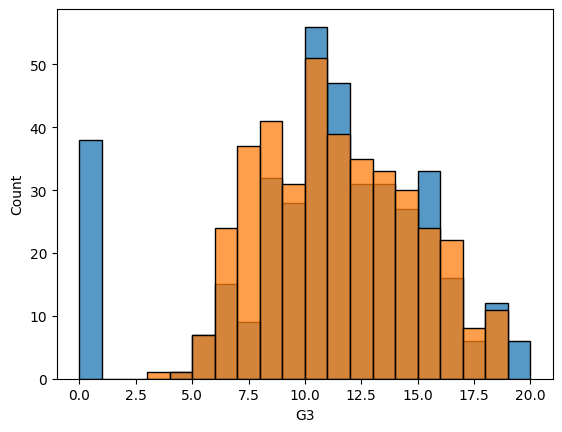

In [8]:
sns.histplot(sm['G3'], binwidth = 1), sns.histplot(sm['G1'], binwidth = 1)

Заметим, что большая часть учеников за экзамены G1 и G3 набирала около 10 баллов, но в G3 появилось почти 40 нулевых результатов

<Axes: xlabel='G1', ylabel='Count'>

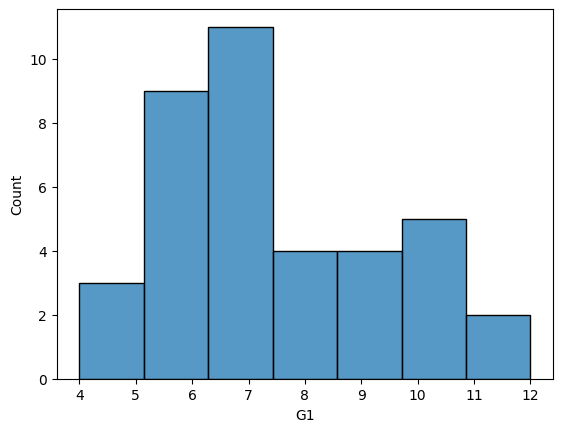

In [9]:
sns.histplot(sm[sm['G3'] == 0]['G1'])

In [10]:
sm[sm['G3'] == 0]['G1'].mean()

np.float64(7.526315789473684)

Прошлый экзамен данные обучающиеся сдали 7-8 баллов, нулей не было. Будем считать, что данные ученики не писали экзамен G3 по какой-либо причине, например из-за перевода в другую школу

In [11]:
sm = sm[sm['G3'] > 0]

In [12]:
sm_columns = sm.drop(columns = 'G3').columns

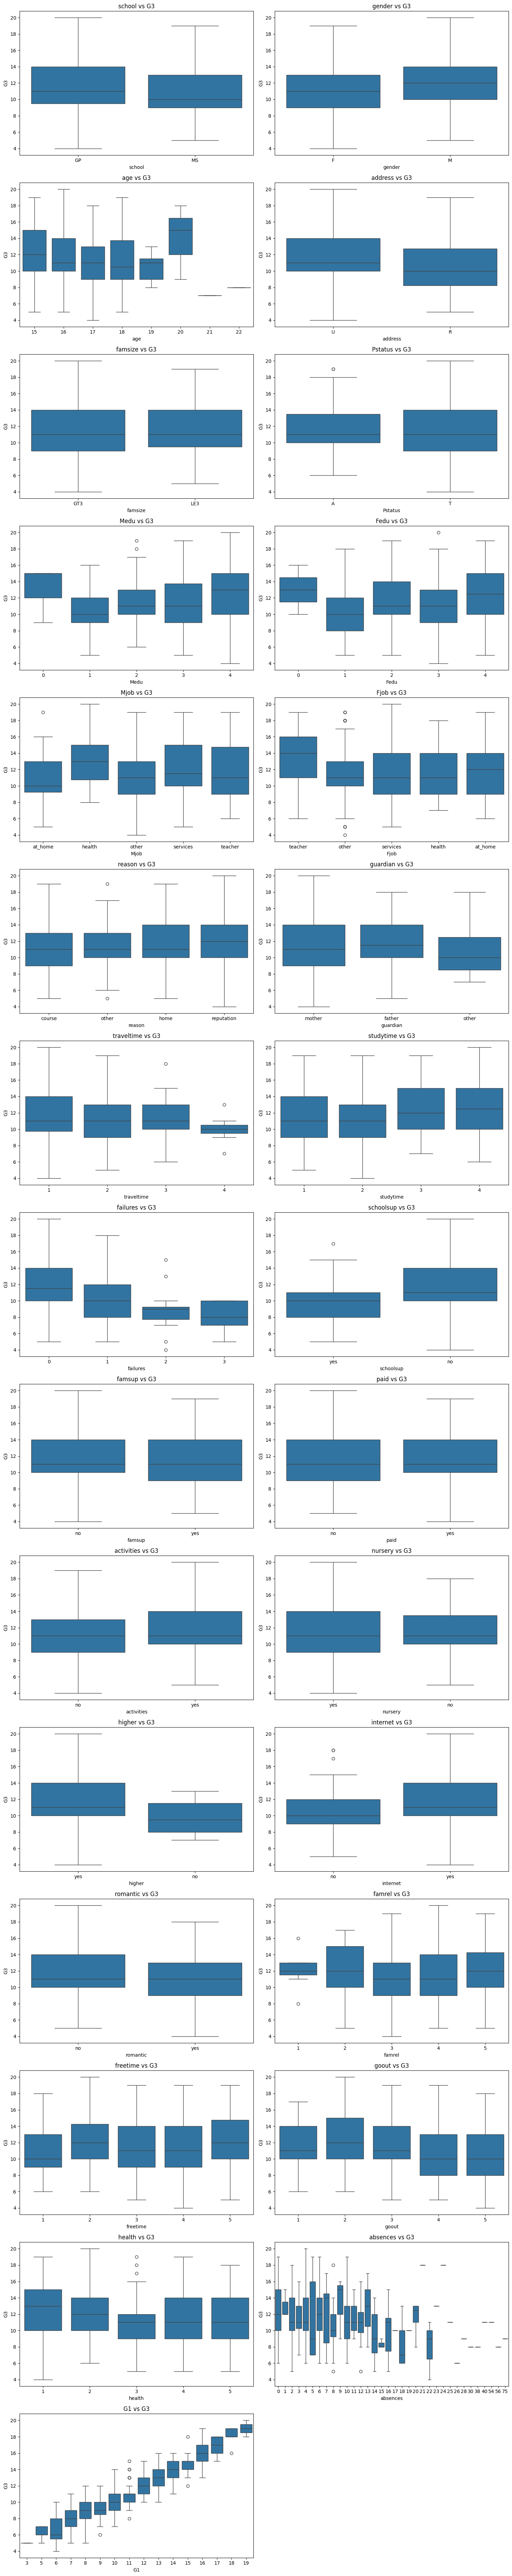

In [13]:
n_cols = 2
n_rows = 15

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]

for i, column in enumerate(sm_columns):
    sns.boxplot(data=sm, x=column, y='G3', ax=axes[i])
    axes[i].set_title(f'{column} vs G3')

for i in range(len(sm_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Из данных графиков видно, что линейная зависимость явно просматривается для графика G1 - G3

Проведём целевое кодирование и нормализацию всех факторов

In [14]:
for column in sm_columns:
    sm_group = sm.groupby(column).agg({'G3':'mean'}).round(2)
    column_dict = sm_group['G3'].to_dict()
    sm[column] = sm[column].map(column_dict).astype('float')

In [15]:
for column in sm_columns:
    sm[column] = (sm[column] - sm[column].min()) / (sm[column].max() - sm[column].min())

In [16]:
sm.head()

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,G3
0,1.0,0.0,0.598571,1.0,0.0,1.0,0.757246,0.752066,0.000000,1.000000,...,1.0,0.0,1.0,0.159574,0.218045,0.085890,0.000000,0.480833,0.085714,6
1,1.0,0.0,0.598571,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,0.808511,0.218045,0.638037,0.000000,0.440000,0.085714,6
2,1.0,0.0,0.734286,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,0.159574,0.218045,1.000000,0.000000,0.436667,0.211429,10
3,1.0,0.0,0.734286,1.0,0.0,0.0,0.757246,0.409091,1.000000,0.067961,...,1.0,1.0,0.0,0.000000,1.000000,1.000000,0.302817,0.492500,0.690714,15
4,1.0,0.0,0.688571,1.0,0.0,0.0,0.394928,0.314050,0.052133,0.000000,...,1.0,0.0,1.0,0.159574,0.218045,1.000000,0.302817,0.440000,0.123571,10


# Построение модели

Для построения модели выберем подходящие для этого факторы. Для этого рассчитаем корреляцию 29 факторов со значениями G3

In [17]:
def correlation_solution(x, y):
    """
    Принимает на вход два списка численных значений и рассчитывает их корреляцию.
    
    Аргументы:
        x: Первый список численных значений.
        y: Второй список численных значений.
        
    Возвращаемое значение:
        Корреляция значений из списка x со значениями из списка y.
        Значение корреляции должно быть округлено до 2 знаков после запятой.
    """
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)

    s1 = 0
    s2 = 0
    s3 = 0
    for xi, yi in zip(x, y):
        s1 += (xi - mean_x)*(yi - mean_y)
        s2 += (xi - mean_x)**2
        s3 += (yi - mean_y)**2

    corr = s1 / (s2*s3)**0.5

    return round(corr, 3)

In [18]:
corr_G3 = []

for column in sm_columns:
    x = sm[column]
    y = sm['G3']
    corr = correlation_solution(x, y)
    print(column, corr)
    if abs(corr) >= 0.2:
        corr_G3.append([[column, corr]])

school 0.084
gender 0.102
age 0.189
address 0.13
famsize 0.04
Pstatus 0.027
Medu 0.22
Fedu 0.193
Mjob 0.215
Fjob 0.165
reason 0.063
guardian 0.074
traveltime 0.106
studytime 0.189
failures 0.298
schoolsup 0.238
famsup 0.067
paid 0.029
activities 0.059
nursery 0.027
higher 0.113
internet 0.112
romantic 0.05
famrel 0.097
freetime 0.128
goout 0.191
health 0.141
absences 0.374
G1 0.896


In [19]:
corr_G3

[[['Medu', 0.22]],
 [['Mjob', 0.215]],
 [['failures', 0.298]],
 [['schoolsup', 0.238]],
 [['absences', 0.374]],
 [['G1', 0.896]]]

С G3 значимую корреляцию имеет только G1, поэтому для первого варианта модели достаточно рассмотреть линейную регрессию с двумя параметрами w0, w1

Модель для данных шести факторов сделаем после этого и сраним точности этих двух моделей

### Первая модель

In [20]:
sm1 = sm[['G1', 'G3']]

In [21]:
def two_parameters_linear_regression_solution(x, y):
    """
    Строит модель линейной регрессии, которая по фактору x предсказывает значение фактора y.
    
    Аргументы:
        x: Список объектов фактора, на основе которого нужно научиться предсказывать значение целевой характеристики.
        y: Список значений предсказываемой характеристики.
        
    Возвращаемое значение:
        Возвращает пару параметров модели: свободный коэффициент w0, вес w1 перед фактором x.
    """
    x_mean = sum(x) / len(x)
    y_mean = sum(y) / len(y)

    sum_1 = 0
    sum_2 = 0

    for i in range(len(x)):
        sum_1 += (x[i] - x_mean)*(y[i] - y_mean)
        sum_2 += (x[i] - x_mean)**2

    w1 = sum_1 / sum_2
    w0 = y_mean - w1 * x_mean

    return w0, w1

Чтобы избежать переобучения модели будем делить совокупность учеников на обучающую и тестовую (кросс-валидация)

Данных мало, поэтому будем использовать метод k-fold

In [22]:
def split_into_k(l, k):
    """
    Разделяет список на k частей.
    
    Аргументы:
        l: Список с объектами.
        k: Число частей, на которые нужно разделить список.
        
    Возвращаемое значение:
        Возвращает список из k частей исходного списка.
    """
    l_mod_k = len(l) % k
    l_div_k = len(l) // k
    
    res = []
    
    for i in range(k):
        res.append(l[i * l_div_k:(i + 1) * l_div_k])
        
    for i in range(l_mod_k):
        res[i].append(l[l_div_k * k + i])
        
    return res

In [23]:
def mae_model(w, x, y):
    """
    Оценивает ошибку модели по метрике «среднее отклонение от предсказанного значения».
    
    Аргументы:
        w: Веса модель.
        x: Список объектов тестовой выборки.
        y: Список значений предсказываемой характеристики для объектов из тестовой выборки.
                Значение на i-ой позиции в списке соответствует i-ому объекту тестовой выборки.
        
    Возвращаемое значение:
        Среднее отклонение модели.
    """
    y_pred = []
    res = 0
    
    for i in range(len(y)):
        y_pred.append(w[0] + w[1] * x[i])
        res += abs(y_pred[i] - y[i])
        
    return res / len(y)

In [24]:
def k_fold_solution(x, y, k, random_gen):
    """
    Проводит кросс-валидацию заданной модели методом k-Fold.
    
    Аргументы:
        x: Список объектов, на основе которых нужно построить модель.
                Каждый объект представлен списком значений факторов.
        y: Список значений предсказываемой величины для каждого из объектов.
                На i-ой позиции в списке y находится предсказываемое
                значение для i-го объекта из списка x.
        k: Количество частей, на которые нужно разбить данные при кросс-валидации.
        random_gen: Генератор случайных чисел.
        
    Возвращаемое значение:
        Усреднённая по всем итерациям k-Fold точность модели.
    """
    xy = list(zip(x, y))
    random_gen.shuffle(xy)
    
    x = [x[0] for x in xy]
    y = [y[1] for y in xy]
    
    x_k = split_into_k(x, k)
    y_k = split_into_k(y, k)
    
    mae_l = []
    w_l = []
    for i in range(k):
        x_train = [x for j in range(k) if j != i for x in x_k[j]]
        y_train = [y for j in range(k) if j != i for y in y_k[j]]
        x_test = x_k[i]
        y_test = y_k[i]
        w = two_parameters_linear_regression_solution(x_train, y_train)
        mae_l.append(mae_model(w, x_test, y_test))
        w_l.append(w)
    
    return mae_l, w_l

In [25]:
random_gen = random.Random()

In [26]:
x = sm1['G1']
y = sm1['G3']

In [27]:
mae_l, w_l = k_fold_solution(x, y, 10, random_gen)

In [28]:
mae_l.sort()

In [29]:
float(round(mae_l[0], 2)), float(round(mae_l[-1], 2))

(0.97, 1.39)

In [30]:
w_l = np.array(w_l).T

In [31]:
w_mean = []
for i in range(len(w_l)):
    w_mean.append(float(w_l[i].mean().round(2)))

In [32]:
w_mean

[5.0, 14.0]

Получилась модель, которая предсказывает оценку студентов с ошибкой из промежутка [0.97, 1.39]

### Вторая модель

In [33]:
def linear_regression_solve_solution(x, y):
    """
    С помощью метода МНК строит модель линейной регрессии по переданному набору данных.
    
    Аргументы:
        x: Список объектов, которые модель должна использовать для предсказания.
        y: Список значений предсказываемой величины.
        
    Возвращаемое значение:
        Возвращает вектор весов модели. 
        Координата вектора с индексом 0 соответствует свободному коэффициенту модели.
        Координата вектора с индексом i соответствует фактору с индексом i - 1 в списке factor_names.
    """
    e = np.ones((len(x), 1))
    x = np.hstack([e, x])
    
    xtx_m1 = np.linalg.inv(np.matmul(x.T, x))
    w = np.matmul(np.matmul(xtx_m1, x.T), y)

    return w.round(2)

In [34]:
def mae_model_2(w, x, y):
    """
    Оценивает ошибку модели по метрике «среднее отклонение от предсказанного значения».
    
    Аргументы:
        w: Веса модель.
        x: Список объектов тестовой выборки.
        y: Список значений предсказываемой характеристики для объектов из тестовой выборки.
                Значение на i-ой позиции в списке соответствует i-ому объекту тестовой выборки.
        
    Возвращаемое значение:
        Среднее отклонение модели.
    """
    y_pred = []
    res = 0
    
    for i in range(len(y)):
        y_pred.append(w[0] + np.dot(w[1:], x[i]))
        res += abs(y_pred[i] - y[i])
        
    return res / len(y)

In [35]:
def k_fold_solution_2(x, y, k, random_gen):
    """
    Проводит кросс-валидацию заданной модели методом k-Fold.
    
    Аргументы:
        data: Таблица с объектами рассматриваемой совокупности.
        x_names: Список названий факторов
        y_name: Название колонки значений предсказываемой величины
        k: Количество частей, на которые нужно разбить данные при кросс-валидации.
        random_gen: Генератор случайных чисел.
        
    Возвращаемое значение:
        Усреднённая по всем итерациям k-Fold точность модели.
    """
    xy = list(zip(x, y))
    random_gen.shuffle(xy)
    
    x = [x[0] for x in xy]
    y = [y[1] for y in xy]
    
    x_k = split_into_k(x, k)
    y_k = split_into_k(y, k)
    
    mae_l = []
    w_l = []
    for i in range(k):
        x_train = [x for j in range(k) if j != i for x in x_k[j]]
        y_train = [y for j in range(k) if j != i for y in y_k[j]]
        x_test = x_k[i]
        y_test = y_k[i]
        w = linear_regression_solve_solution(x_train, y_train)
        mae_l.append(mae_model_2(w, x_test, y_test))
        w_l.append(w)
    
    return mae_l, w_l

In [36]:
corr_G3

[[['Medu', 0.22]],
 [['Mjob', 0.215]],
 [['failures', 0.298]],
 [['schoolsup', 0.238]],
 [['absences', 0.374]],
 [['G1', 0.896]]]

In [37]:
x_names = [corr_G3[i][0][0] for i in range(len(corr_G3))]
y_name = 'G3'

In [38]:
x = [sm[x_names].iloc[i].to_list() for i in range(len(sm))]
y = sm[y_name].to_list()

In [39]:
mae_l, w_l = k_fold_solution_2(x, y, 10, random_gen)

In [40]:
mae_l.sort()

Применим бутстрап по 0.05 с каждой стороны

In [41]:
float(round(mae_l[0], 2)), float(round(mae_l[-1], 2))

(0.8, 1.33)

In [42]:
w_l = np.array(w_l).T

In [43]:
w_mean = []
for i in range(len(w_l)):
    w_mean.append(float(w_l[i].mean().round(2)))

In [44]:
w_mean

[2.78, 0.37, 0.44, 0.22, 0.08, 4.5, 13.06]

Ошибка модели оказалась в промежутке [0.8, 1.33], что не превосходит первую модель. Наиболее значимыми факторами оказались оценка за первый триместр и количество пропусков обучающегося